<a href="https://colab.research.google.com/github/ajmateti/ML-Projects/blob/master/mnist_using_cnn_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train[0].shape

(28, 28)

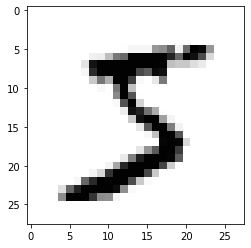

In [0]:
plt.imshow(X_train[0],cmap="Greys");

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train.shape

(60000,)

In [0]:
y_train = to_categorical(y_train)

In [0]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_test = to_categorical(y_test,num_classes=10)

In [0]:
y_test.shape

(10000, 10)

In [0]:
X_train , X_test = X_train/255, X_test/255

In [0]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

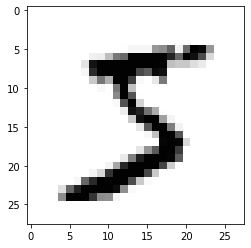

In [0]:
plt.imshow(X_train[0],cmap="Greys")

In [0]:
X_train = X_train.reshape(60000,28,28,1)

In [0]:
X_test = X_test.reshape(10000,28,28,1)

In [0]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

In [0]:

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss",patience=2)

In [0]:
model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.0412 - val_accuracy: 0.9880
Epoch 2/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0403 - val_accuracy: 0.9891
Epoch 3/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0398 - val_accuracy: 0.9896
Epoch 4/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0426 - val_accuracy: 0.9887
Epoch 5/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.0423 - val_accuracy: 0.9897


In [0]:
model.history.history

{'accuracy': [0.9967333078384399,
  0.9977333545684814,
  0.9981666803359985,
  0.99836665391922,
  0.9982666373252869],
 'loss': [0.00993782002478838,
  0.006625095847994089,
  0.006261483766138554,
  0.005227735266089439,
  0.004589005373418331],
 'val_accuracy': [0.9879999756813049,
  0.9890999794006348,
  0.9896000027656555,
  0.9886999726295471,
  0.9897000193595886],
 'val_loss': [0.04120730236172676,
  0.04025203362107277,
  0.039808239787817,
  0.04257221147418022,
  0.042291056364774704]}

In [0]:
metrics = pd.DataFrame( model.history.history)

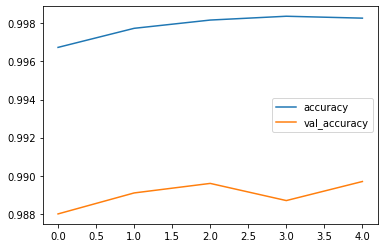

In [0]:
metrics[['accuracy','val_accuracy']].plot()

In [0]:
predictions = np.argmax(model.predict(X_test), axis=-1)
#predictions = model.predict(X_test)
y_orig = np.argmax(y_test,axis=-1)

In [0]:

from sklearn.metrics import classification_report,confusion_matrix

In [0]:
predictions.shape, y_orig.shape

((10000,), (10000,))

In [0]:
print(classification_report(y_orig,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [0]:
print(confusion_matrix(y_orig,predictions))

[[ 976    0    1    0    0    0    0    1    1    1]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   2    2 1022    1    0    0    0    3    2    0]
 [   0    1    0 1000    0    6    0    0    3    0]
 [   0    1    1    0  962    0    4    0    3   11]
 [   1    0    0    4    0  886    1    0    0    0]
 [   4    2    1    0    1    3  944    0    3    0]
 [   0    2    4    1    0    0    0 1020    1    0]
 [   3    0    1    0    0    0    1    0  967    2]
 [   1    1    0    1    4    5    0    4    8  985]]
